**Objective**


This Data Science for Good Competition intends to use remote sensing techniques to understand Environmental Emissions. Since the whole concept of Satellite Imagery and can be a little overwhelming, this is just an introductory kernel, where I try to explain the various terms and datasets related to satellite Imagery.



**Problem Statement: Measuring Emissions factors from Satellite Data**
Air Quality Management is an important area and influences a lot of decisions taken by countries. But how does one ascertain the Air quality of a place? This is done by calculating the Emissions Factor of that area.



**What is the Emission factor?  **
An emission intensity is the emission rate of a given pollutant relative to the intensity of a specific activity, or an industrial production process; for example grams of carbon dioxide released per megajoule of energy produced, or the ratio of greenhouse gas emissions produced to gross domestic product. **

* **What is Remote Sensing??**
Remote sensing is the acquisition of information about an object or phenomenon without making physical contact with the object and thus in contrast to on-site observation, especially the Earth.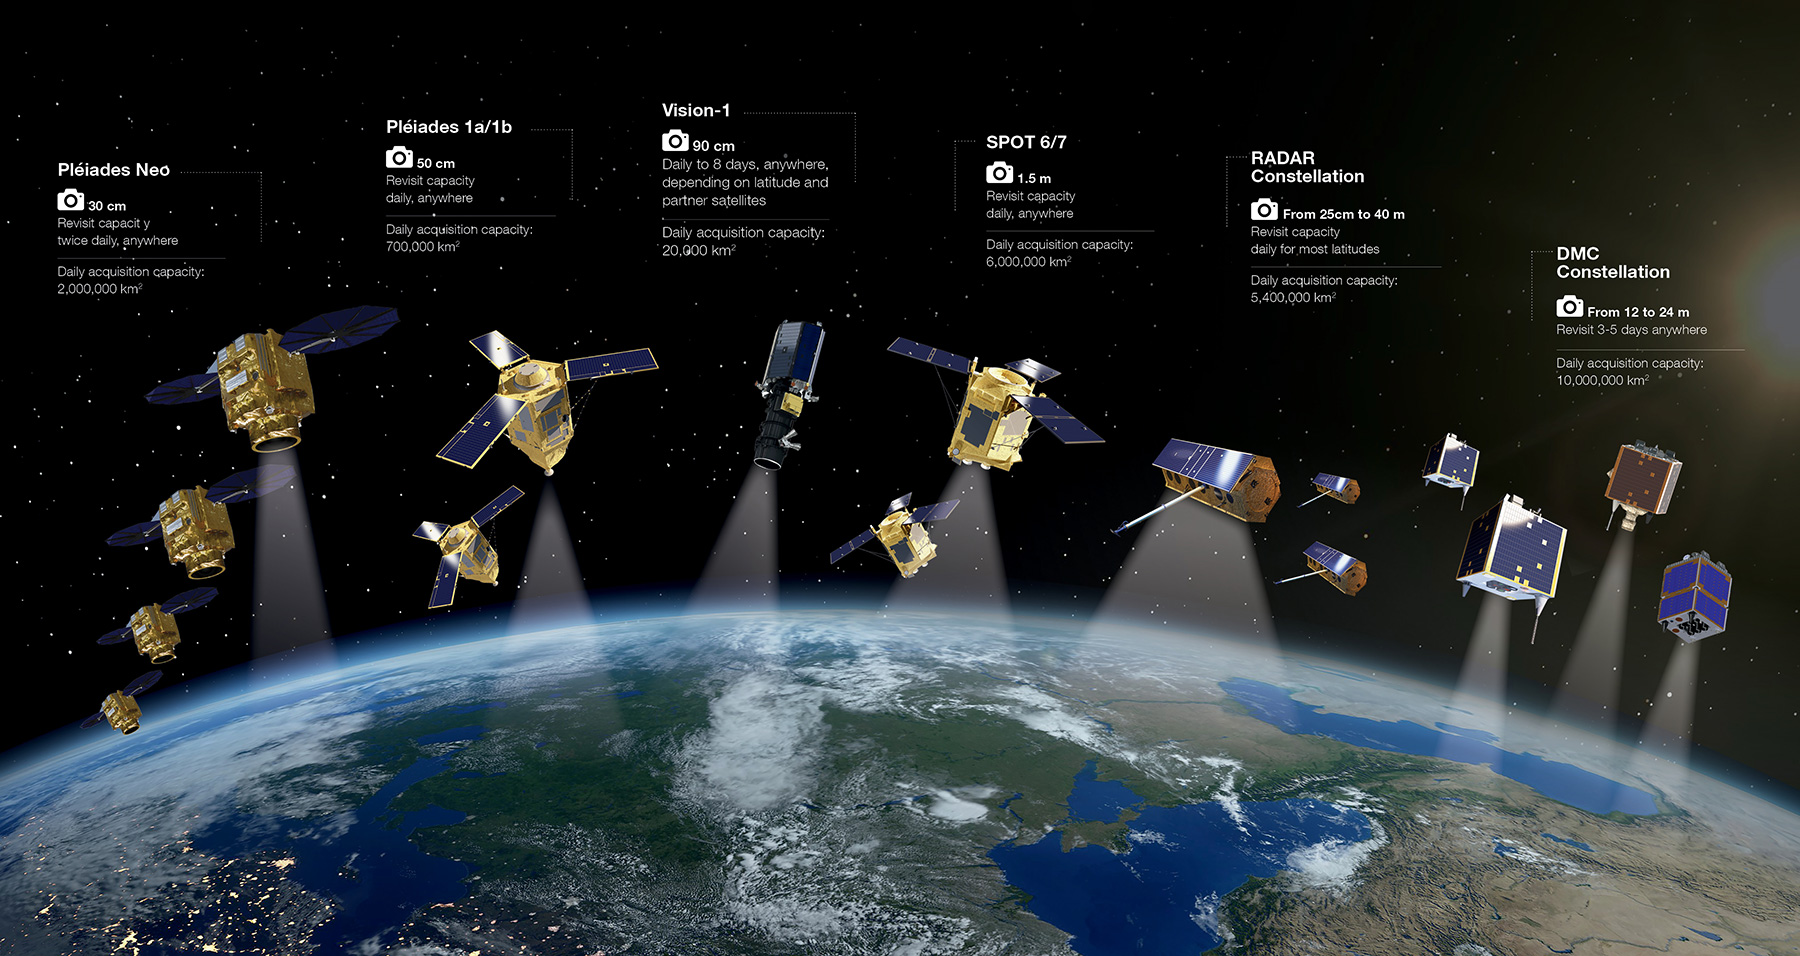

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

**Importing necessary libraries**

In [ ]:
## Importing necessary libraries
import numpy as np
import pandas as pd
from skimage.io import imread
import tifffile as tiff 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white", palette="muted", color_codes=True)

from ast import literal_eval

# Analysing datetime
import datetime as dt
from datetime import datetime 

# Plotting geographical data
import ee
import folium
from folium import plugins
import rasterio as rio

# File system manangement
import os, random

**Data Loading**

In [ ]:
data = pd.read_csv('/kaggle/input/ds4g-environmental-insights-explorer/eie_data/gppd/gppd_120_pr.csv')

**Analyize The Data**

In [ ]:
data.columns

In [ ]:
data.head(3)

In [ ]:
data.shape

In [ ]:
data.info()

In [ ]:
# Columns with only 0 or NaN values
to_drop = ["generation_gwh_2013", 
           "generation_gwh_2014", 
           "generation_gwh_2015", 
           "generation_gwh_2016",
           "generation_gwh_2017", 
           "other_fuel1",
           "other_fuel2",
           "other_fuel3",
           "year_of_capacity_data"]

gpp =data.drop(to_drop, axis=1)
gpp.head(3)

In [ ]:
# Columns with all same values
to_drop = ["country", 
           "country_long", 
           "geolocation_source"
          ]

globalPowerPlant = data.drop(to_drop, axis=1)
globalPowerPlant.head(3)


In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))

sns.countplot(x="primary_fuel",
              data=globalPowerPlant,
              ax=ax[0])
sns.catplot(x="primary_fuel",
            y="capacity_mw",
            data=globalPowerPlant,
            jitter=False,
            ax=ax[1])

plt.close(2) #catplot is a figure-level function, close empty plt
plt.tight_layout()

In [ ]:
sns.barplot(x='primary_fuel',y="capacity_mw",
            data=globalPowerPlant.groupby(['primary_fuel']).sum().reset_index())

In [ ]:
sns.barplot(x="primary_fuel",
            y="estimated_generation_gwh",
            data=globalPowerPlant.groupby(['primary_fuel']).sum().reset_index())

In [ ]:
data_path = '/kaggle/input/ds4g-environmental-insights-explorer'

image = '/eie_data/s5p_no2/s5p_no2_20190629T174803_20190705T194117.tif'

data = tiff.imread(data_path + image)

print('Data shape:', data.shape)

In [ ]:
print('{:.0f}% of the dataset is null'.format(
    np.isnan(data[:, :, 0]).sum() / np.multiply(*data[:, :, 0].shape)*100))

print('Last measurement at y index {}'.format(np.argwhere(np.isnan(data[0, :, 0])).min()-1))

**Detail Analysis**

NO2

In [ ]:
titles = ['NO2_column_number_density',
          'tropospheric_NO2_column_number_density', 
          'stratospheric_NO2_column_number_density',
          'NO2_slant_column_number_density']

f = plt.figure()
f.set_size_inches(8, 8)
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.heatmap(data[:, :, i], cbar=False)
    f
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(titles[i], fontsize=10)
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html

**For Wheather**

In [ ]:
titles = ['tropopause_pressure', 'absorbing_aerosol_index', 'cloud_fraction']
f = plt.figure()
f.set_size_inches(12,4)
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.heatmap(data[:, :, 4+i], cbar=False)
    f
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(titles[i], fontsize=16)

**Satellite Information**

In [ ]:
titles = ['sensor_altitude', 'sensor_azimuth_angle', 'sensor_zenith_angle',
          'solar_azimuth_angle', 'solar_zenith_angle']

f = plt.figure()
f.set_size_inches(12, 8)
for i in range(5):
    plt.subplot(2, 3, i+1)
    sns.heatmap(data[:, :, 7+i], cbar=False)
    f
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title(titles[i], fontsize=16)

In [ ]:
for i in range(5):
    print('{}: {:.2f}'.format(titles[i], np.nanmean(data[:, :, i+7])))


*Conclusion..*
from the data **what i undustand** ? 

Approximately 65 percent of the data is empyty.and each band reflects a different type of calculation and how I can get the NO2 concentration value from the TIFF file for use in this competition.
